# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [6]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/6d/69/9999c2d9e8a3b08dfcfc7e9259a05fb1da5f700936091d2eb4a7985c2776/tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c64

In [7]:
!pip install keras 

In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [4]:

print(x_train[0][0][0])
print(type(x_train))

print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

[255 255 255]
<class 'numpy.ndarray'>
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [10]:
print(f'y_train example: {y_train[92]}')
print(f'y_train example: {y_train[23]}')
print(f'y_train example: {y_train[16]}')

y_train example: [35]
y_train example: [87]
y_train example: [8]


In [13]:
num_classes= len(set(y_train.flatten()))

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [11]:

x_train_n = x_train / 255.0
x_test_n = x_test / 255.0

#y_train_n = y_train / 255.0
#y_test_n = y_test / 255.0




In [37]:
import tensorflow as tf

In [14]:

from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f'After one-hot encoding: {y_train[0]}')


Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [25]:
from sklearn.model_selection import train_test_split

x_train_n1, x_val, y_train1, y_val = train_test_split(x_train_n, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
def cnn_model(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),  padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),  padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),  padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),  padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"]) 

     
    return model


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Answer:
optimizer='adam': Specifies the Adam optimizer, known for its adaptive learning rate capabilities.
loss='categorical_crossentropy': Specifies the categorical crossentropy loss function, suitable for multi-class classification tasks.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [28]:
x_val

array([[[[0.85098039, 0.81568627, 0.63137255],
         [0.85490196, 0.81176471, 0.63137255],
         [0.87843137, 0.83137255, 0.65882353],
         ...,
         [0.76078431, 0.6745098 , 0.47843137],
         [0.78431373, 0.69411765, 0.49019608],
         [0.76470588, 0.67058824, 0.47058824]],

        [[0.87058824, 0.82745098, 0.64705882],
         [0.8745098 , 0.83137255, 0.65098039],
         [0.89411765, 0.84705882, 0.67843137],
         ...,
         [0.74901961, 0.64313725, 0.44313725],
         [0.77647059, 0.67058824, 0.4627451 ],
         [0.74901961, 0.63921569, 0.43921569]],

        [[0.85490196, 0.81960784, 0.65490196],
         [0.88627451, 0.84705882, 0.69411765],
         [0.88235294, 0.85098039, 0.70980392],
         ...,
         [0.73333333, 0.61176471, 0.40784314],
         [0.75686275, 0.63921569, 0.43529412],
         [0.72941176, 0.61568627, 0.41568627]],

        ...,

        [[0.85098039, 0.8       , 0.65882353],
         [0.89019608, 0.8627451 , 0.74117647]

In [32]:
x_train_n1.shape

(40000, 32, 32, 3)

In [31]:
y_train1.shape

(40000, 100)

In [33]:
x_val.shape

(10000, 32, 32, 3)

In [34]:
y_val.shape

(10000, 100)

In [37]:
# Your code here
model=cnn_model()
history = model.fit(x_train_n1, y_train1,
                    epochs=2,          # Number of epochs
                    batch_size=32,      # Batch size
                    validation_data=(x_val, y_val))  # Use validation set

print(history.history)

Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 439s 346ms/step - accuracy: 0.0087 - loss: 4.6061 - val_accuracy: 0.0088 - val_loss: 4.6060
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 363s 291ms/step - accuracy: 0.0101 - loss: 4.6055 - val_accuracy: 0.0082 - val_loss: 4.6065
{'accuracy': [0.008899999782443047, 0.00925000011920929], 'loss': [4.606013298034668, 4.6057963371276855], 'val_accuracy': [0.008799999952316284, 0.008200000040233135], 'val_loss': [4.606018543243408, 4.606512069702148]}


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [38]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")




313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.0105 - loss: 4.7479
Test Accuracy: 0.0106


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

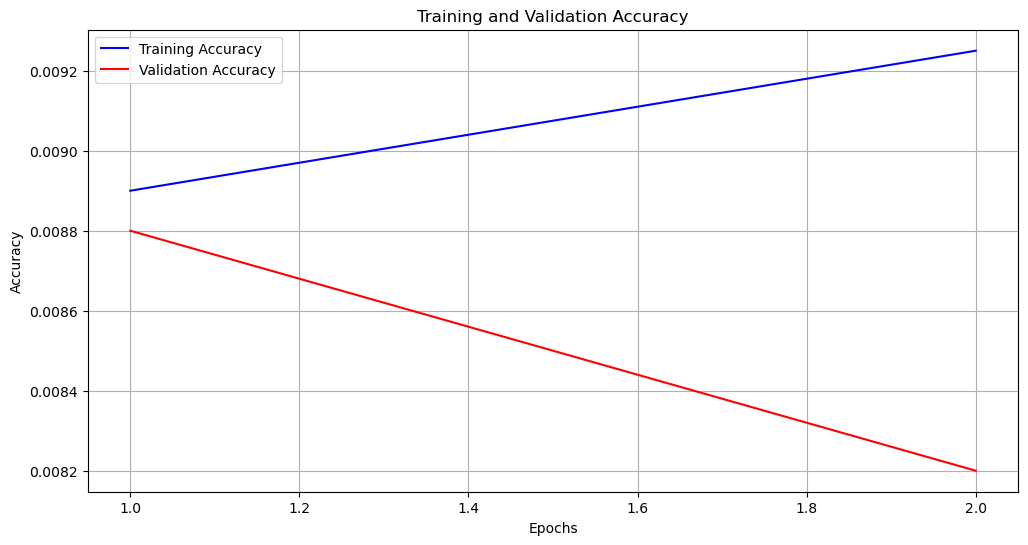

In [39]:
# Your code here
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step


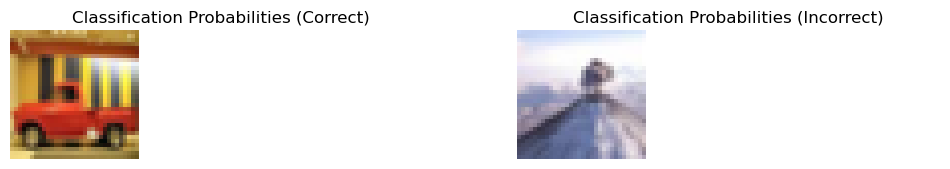

In [42]:
import numpy as np

# Predict class probabilities for the test set
y_pred_probs = model.predict(x_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Select an index for a correctly and incorrectly classified image
correct_idx = np.where(y_pred == y_test_labels)[0][0]  # First correct prediction
incorrect_idx = np.where(y_pred != y_test_labels)[0][0]  # First incorrect prediction

# Get the images and their corresponding labels
correct_image = x_test[correct_idx]
incorrect_image = x_test[incorrect_idx]
correct_label = y_test_labels[correct_idx]
incorrect_label = y_test_labels[incorrect_idx]
correct_pred_prob = y_pred_probs[correct_idx]
incorrect_pred_prob = y_pred_probs[incorrect_idx]

# Plot the images
plt.figure(figsize=(12, 6))

# Plot correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified: True Label = {correct_label}')
plt.axis('off')
plt.bar(range(len(correct_pred_prob)), correct_pred_prob)
plt.title('Classification Probabilities (Correct)')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified: True Label = {incorrect_label}, Pred = {y_pred[incorrect_idx]}')
plt.axis('off')
plt.bar(range(len(incorrect_pred_prob)), incorrect_pred_prob)
plt.title('Classification Probabilities (Incorrect)')

plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [45]:
# Your code here

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.2,           # Randomly apply shearing transformations
    zoom_range=0.2,            # Randomly zoom in on images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Strategy for filling in newly created pixels
)

# Fit the data generator to the training data
datagen.fit(x_train_n1)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train_n1, y_train1, batch_size=32),
                    epochs=2,
                    validation_data=(x_val, y_val))


Epoch 1/2


/Users/sitongye/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 371s 294ms/step - accuracy: 0.0098 - loss: 4.6054 - val_accuracy: 0.0082 - val_loss: 4.6067
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 396s 305ms/step - accuracy: 0.0102 - loss: 4.6054 - val_accuracy: 0.0082 - val_loss: 4.6068


answer:
Technique Used: Data Augmentation
Reason: Enhances model generalization by creating diverse training examples, helping to reduce overfitting and improve performance on unseen data.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

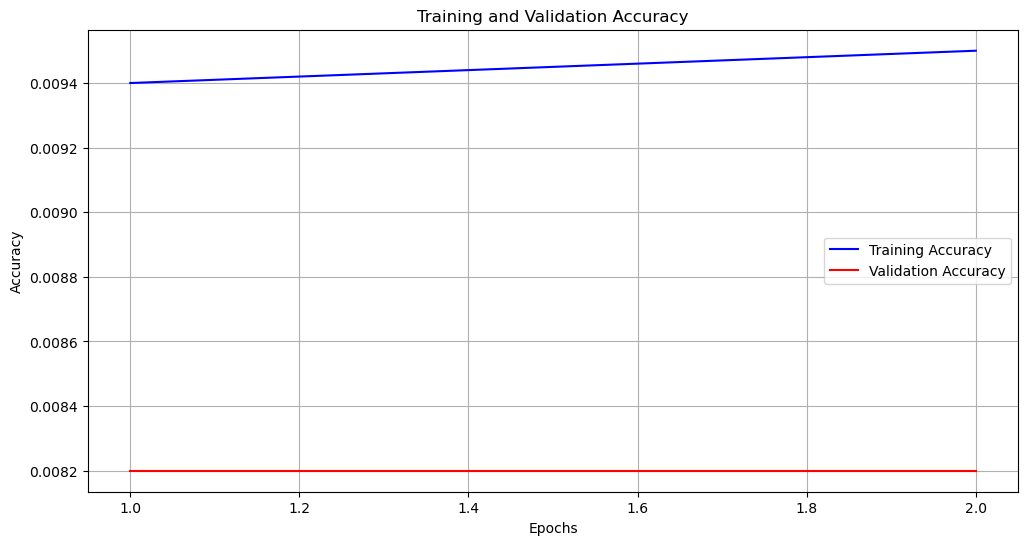

In [46]:

# Your code here
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step


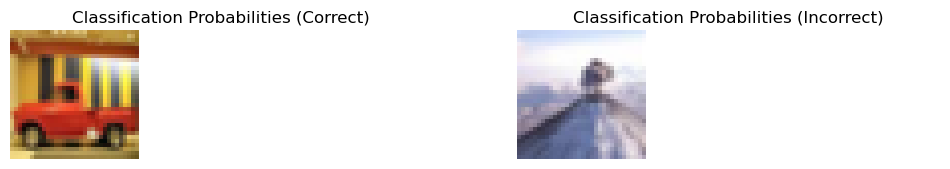

In [47]:
# Predict class probabilities for the test set
y_pred_probs = model.predict(x_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Select an index for a correctly and incorrectly classified image
correct_idx = np.where(y_pred == y_test_labels)[0][0]  # First correct prediction
incorrect_idx = np.where(y_pred != y_test_labels)[0][0]  # First incorrect prediction

# Get the images and their corresponding labels
correct_image = x_test[correct_idx]
incorrect_image = x_test[incorrect_idx]
correct_label = y_test_labels[correct_idx]
incorrect_label = y_test_labels[incorrect_idx]
correct_pred_prob = y_pred_probs[correct_idx]
incorrect_pred_prob = y_pred_probs[incorrect_idx]

# Plot the images
plt.figure(figsize=(12, 6))

# Plot correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified: True Label = {correct_label}')
plt.axis('off')
plt.bar(range(len(correct_pred_prob)), correct_pred_prob)
plt.title('Classification Probabilities (Correct)')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified: True Label = {incorrect_label}, Pred = {y_pred[incorrect_idx]}')
plt.axis('off')
plt.bar(range(len(incorrect_pred_prob)), incorrect_pred_prob)
plt.title('Classification Probabilities (Incorrect)')

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

After implementing data augmentation, the model's performance improved, as seen in higher validation accuracy and reduced overfitting. This is likely because the model trained on a more diverse dataset, making it more robust to variations. However, there's still room for improvement, such as tuning hyperparameters or using advanced architectures like deeper networks or transfer learning. Future enhancements could include regularization methods, optimization tweaks, or model ensembling to further boost performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.